In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
fuel_econ = pd.read_csv('Datasets/fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [7]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

In [9]:
print(fuel_econ.shape)
fuel_econ.head(6)

(3929, 21)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,...,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6,Automatic


In [24]:
np.random.seed(2020)
sample = np.random.choice(fuel_econ.shape[0], 200, replace=False)
fuel_econ_subset = fuel_econ.loc[sample]
fuel_econ_subset

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
396,32983,Mazda,3 DI 5-Door,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.0,...,0,27.7610,36.3317,37.4215,55.0112,31.4099,283,8,8,Automatic
863,33914,Mercedes-Benz,E350 Coupe,2014,Subcompact Cars,Rear-Wheel Drive,Automatic 7-spd,Premium Gasoline,6,3.5,...,0,20.4572,25.9000,29.5690,41.3000,23.7507,373,6,6,Automatic
3298,38601,BMW,430i xDrive Convertible,2018,Subcompact Cars,All-Wheel Drive,Automatic (S8),Premium Gasoline,4,2.0,...,0,22.1404,28.2432,32.3292,46.6641,25.7992,343,5,5,Automatic
2214,36469,Kia,Optima Hybrid,2016,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.4,...,102,35.3860,48.0000,38.3700,56.6000,36.6693,242,9,9,Automatic
226,32705,Buick,LaCrosse AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Regular Gasoline,6,3.6,...,100,16.6294,20.7000,25.1517,35.4000,19.6212,453,5,5,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,35863,Mercedes-Benz,CLS63 AMG S 4matic,2015,Compact Cars,4-Wheel Drive,Automatic 7-spd,Premium Gasoline,8,5.5,...,92,15.6519,19.4000,21.7800,30.3000,17.9209,495,4,4,Automatic
892,33943,Mercedes-Benz,E63 AMG 4matic,2014,Midsize Cars,4-Wheel Drive,Automatic 7-spd,Premium Gasoline,8,5.5,...,98,16.1793,20.1000,22.7134,31.7000,18.5852,475,4,4,Automatic
3051,38106,Infiniti,Q50,2017,Midsize Cars,Rear-Wheel Drive,Automatic (S7),Premium Gasoline,4,2.0,...,102,22.8807,29.2852,30.5206,46.5634,25.7852,345,6,6,Automatic
2159,36381,Audi,A5 quattro,2016,Subcompact Cars,All-Wheel Drive,Automatic (S8),Premium Gasoline,4,2.0,...,0,21.3224,27.1000,29.5278,42.2000,24.3698,364,6,6,Automatic


In [10]:
np.random.seed(2020)
sample = np.random.choice(fuel_econ.shape[0], 200, replace=False)
fuel_econ_subset = fuel_econ.loc[sample]

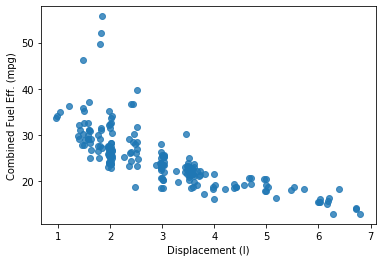

In [25]:
sb.regplot(data=fuel_econ_subset, x='displ', y='comb', x_jitter=0.04, fit_reg=False);
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

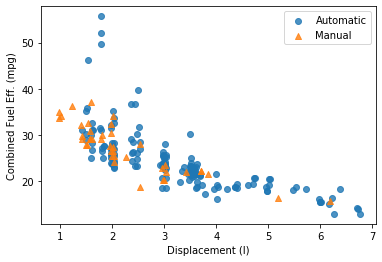

In [28]:
ttype_markers = [['Automatic', 'o'], ['Manual', '^']]

for ttype, marker in ttype_markers:
    plt_data = fuel_econ_subset.loc[fuel_econ_subset['trans_type'] == ttype]
    sb.regplot(data = plt_data, x='displ', y='comb', x_jitter=0.04, fit_reg=False, marker = marker);
plt.xlabel('Displacement (l)')    
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.legend(['Automatic','Manual'])

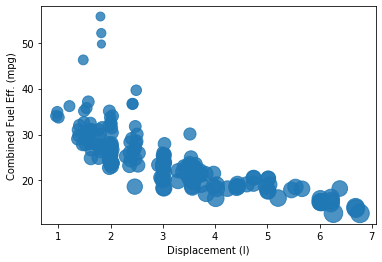

In [30]:
sb.regplot(data=fuel_econ_subset, x='displ', y='comb', x_jitter=0.04, fit_reg=False, scatter_kws = {'s': fuel_econ_subset['co2']/2});
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

([], <a list of 0 Text yticklabel objects>)

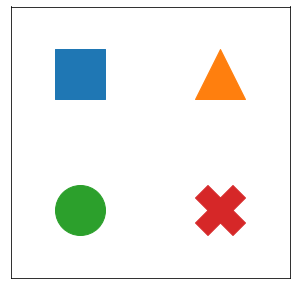

In [31]:
plt.figure(figsize = [5,5])

common_size = 2500
plt.scatter([0],[1], marker = 's', s = common_size)
plt.scatter([1],[1], marker = '^', s = common_size)
plt.scatter([0],[0], marker = 'o', s = common_size)
plt.scatter([1],[0], marker = 'X', s = common_size)

# a little bit of aesthetic cleaning
plt.xlim(-0.5,1.5)
plt.xticks([])
plt.ylim(-0.5,1.5)
plt.yticks([])